In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('infolimpioavanzadoTarget.csv',nrows=500)

In [13]:
data.head()

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0


In [14]:
print(data.shape)

(500, 1285)


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 1285 entries, date to TARGET
dtypes: float64(1280), int64(3), object(2)
memory usage: 4.9+ MB


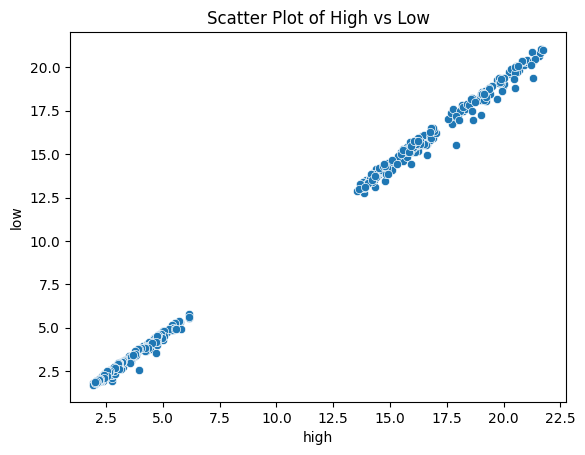

In [16]:
sns.scatterplot(x='high', y='low', data=data)
plt.title('Scatter Plot of High vs Low')
plt.show()

In [17]:
def prepare_data(data_new):
    X = data_new[[ 'open']]  
    y = data_new['close']  
    return X, y


Mean Squared Error: 0.11934246810188281


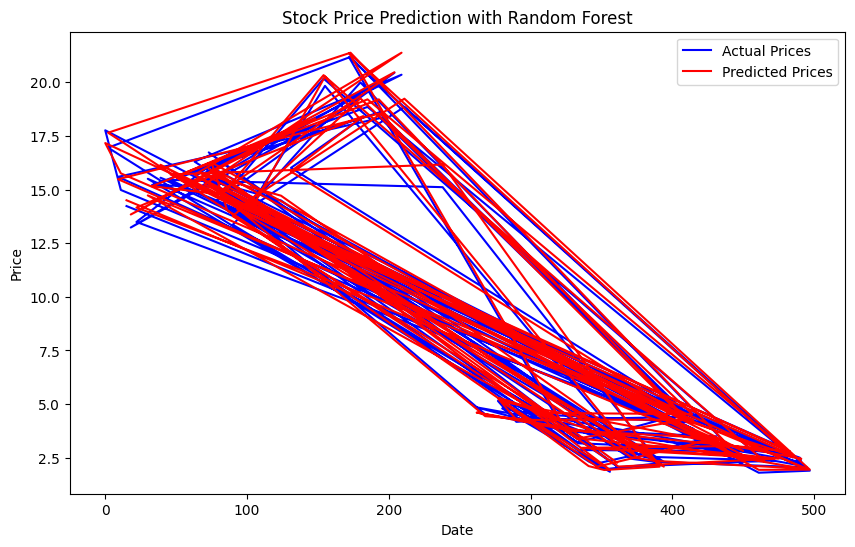

In [18]:
def predict_stock_price_with_random_forest(data):
    X, y = prepare_data(data) 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.index, y_test.values, label='Actual Prices', color='blue')
    plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red')
    plt.title('Stock Price Prediction with Random Forest')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
predict_stock_price_with_random_forest(data)